# 1. 이미지 데이터에 라벨링, 벡터화하기

In [2]:
# train data path
import os
import numpy as np
from numpy import array
TRAIN_DIR = 'D:/MNIST/trainingSet/'
train_folder_list = array(os.listdir(TRAIN_DIR))
train_folder_list

array(['0_zero', '1_one', '2_two', '3_three', '4_four', '5_five', '6_six',
       '7_seven', '8_eight', '9_nine'], dtype='<U7')

In [3]:
# path 라벨링
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()  # LabelEncoder Class 호출
integer_encoded = label_encoder.fit_transform(train_folder_list)
integer_encoded

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int64)

In [4]:
# 라벨링 벡터화
from sklearn.preprocessing import OneHotEncoder
onehot_encoder = OneHotEncoder(sparse=False) 
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
print('integer_encoded:\n', integer_encoded)
print('onehot_encoded:\n', onehot_encoded)

integer_encoded:
 [[0]
 [1]
 [2]
 [3]
 [4]
 [5]
 [6]
 [7]
 [8]
 [9]]
onehot_encoded:
 [[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


C:\Users\tldud\.conda\envs\tldud\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [5]:
type(onehot_encoded)

numpy.ndarray

In [6]:
# 이미지를 불러와서 흑백으로 벡터화 및 라벨링
import cv2
train_input = []
train_label = []
for index in range(len(train_folder_list)):
    path = os.path.join(TRAIN_DIR, train_folder_list[index])
    path = path + '/'
    img_list = os.listdir(path)
    for img in img_list:
        img_path = os.path.join(path, img)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        # cv2.imread: paht경로에 있는 이미지를 흑백으로 불러옴
        train_input.append([np.array(img)])
        train_label.append([np.array(onehot_encoded[index])])

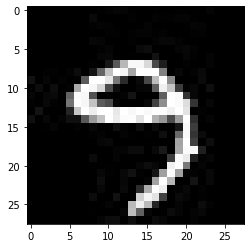

In [7]:
# 마지막 이미지 시각화
%matplotlib inline
from matplotlib import pyplot as plt
plt.imshow(img, cmap='gray')

In [8]:
len(train_input) #train_input은 [[img],[img],...,[img]] 이런 형태

42000

### list형태를 np.array형태(42000,784)로 reshape

In [9]:
train_input = np.reshape(train_input, (-1, 784))
# 이때 -1은 정확한 개수를 모를때 사용. -1대신 42000 넣어도 상관x
train_label = np.reshape(train_label, (-1, 10))
train_input = np.array(train_input).astype(np.float32)
train_label = np.array(train_label).astype(np.float32)

#데이터 섞기
tmp = [[x,y] for x, y in zip(train_input, train_label)]
np.random.shuffle(tmp)
train_input = np.array([n[0] for n in tmp])
train_label = np.array([n[1] for n in tmp])

np.save("train_data.npy", train_input)
np.save("train_label.npy", train_label)
print('train_input.shape: ', train_input.shape)
print('train_label.shape: ', train_label.shape)

train_input.shape:  (42000, 784)
train_label.shape:  (42000, 10)


### test 이미지 데이터(200개) 숫자 변환 전체코드

In [10]:
TEST_DIR = 'D:/MNIST/testSet/'
test_folder_list = array(os.listdir(TEST_DIR))
 
test_input = []
test_label = []
 
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(test_folder_list)
 
onehot_encoder = OneHotEncoder(sparse=False) 
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
 
for index in range(len(test_folder_list)):
    path = os.path.join(TEST_DIR, test_folder_list[index])
    path = path + '/'
    img_list = os.listdir(path)
    for img in img_list:
        img_path = os.path.join(path, img)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        test_input.append([np.array(img)])
        test_label.append([np.array(onehot_encoded[index])])
 
test_input = np.reshape(test_input, (-1, 784))
test_label = np.reshape(test_label, (-1, 10))
test_input = np.array(test_input).astype(np.float32)
test_label = np.array(test_label).astype(np.float32)

#데이터 섞기
tmp = [[x,y] for x, y in zip(test_input, test_label)]
np.random.shuffle(tmp)
test_input = np.array([n[0] for n in tmp])
test_label = np.array([n[1] for n in tmp])

np.save("test_input.npy",test_input)
np.save("test_label.npy",test_label)

C:\Users\tldud\.conda\envs\tldud\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


# 2. ANN을 이용한 MNIST 숫자 분류기 구현

In [11]:
import tensorflow as tf

# 학습을 위한 설정값들을 정의
learning_rate = 0.01
num_epochs = 30     # 학습횟수
batch_size = 256    # 배치개수
display_step = 1    # 손실함수 출력 주기
hidden1_size = 256
hidden2_size = 256

# 입력값과 출력값을 받기 위한 플레이스홀더를 정의
x = tf.placeholder(tf.float32, shape=[None, 784])
y = tf.placeholder(tf.float32, shape=[None, 10])

In [12]:
# ANN 모델을 정의
def build_ANN(x):
    W1 = tf.Variable(tf.random_normal(shape=[784, hidden1_size]))
    b1 = tf.Variable(tf.random_normal(shape=[hidden1_size]))
    H1_output = tf.nn.relu(tf.matmul(x,W1) + b1) # shape (42000,256)
    W2 = tf.Variable(tf.random_normal(shape=[hidden1_size, hidden2_size]))
    b2 = tf.Variable(tf.random_normal(shape=[hidden2_size]))
    H2_output = tf.nn.relu(tf.matmul(H1_output,W2) + b2) # shape (42000,256)
    W_output = tf.Variable(tf.random_normal(shape=[hidden2_size, 10]))
    b_output = tf.Variable(tf.random_normal(shape=[10]))
    logits = tf.matmul(H2_output,W_output) + b_output # shape (42000,10)

    return logits

In [13]:
# ANN 모델을 선언
predicted_value = build_ANN(x)

In [14]:
# 손실함수와 옵티마이저를 정의
# tf.nn.softmax_cross_entropy_with_logits 함수를 이용하여 
# 활성함수를 적용하지 않은 output layer의 결과값(logits)에 softmax 함수를 적용
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=predicted_value, labels=y))
train_step = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(loss)

In [15]:
# 세션을 열고 변수들에 초기값을 할당
sess = tf.Session()
sess.run(tf.global_variables_initializer())

# 지정된 횟수만큼 최적화를 수행
for epoch in range(num_epochs): #num_epochs = 30
    average_loss = 0
    # 전체 배치를 불러옵니다.
    total_batch = int(len(train_input)/batch_size)
    # total_batch = int(42000/256) = 164
    # 모든 배치들에 대해서 최적화를 수행합니다.
    for i in range(total_batch):
        start = ((i+1) * batch_size) - batch_size
        # 데이터를 분할하기 위해 start라는 변수를 선언
        # i는 0에서 164까지 변함
        # i = 0일 때 start에 저장되는 값은 (0+1)*256)-256이므로 0이 저장
        end = ((i+1) * batch_size)
        # 데이터를 분할하기 위해 end라는 변수를 선언
        # i = 0일 때 emd에 저장되는 값은 (0+1)*256)이므로 256이 저장
        batch_xs = train_input[start:end]
        # batch_xs : train 데이터의 input을 저장하는 변수
        # train_input[start:end]는 train_input[0:256]과 같음
        # 즉, train_inpuf에서 0~256에 위치하는 데이터를 불러서 batch_xs에 저장
        batch_ys = train_label[start:end]
        # batch_ys = train 데이터의 label을 저장하는 변수
        # train_label[start:end]는 train_label[0:256]과 같음
        # train_label에서 0~100에 위치하는 데이터를 불러서 batch_ys에 저장
        feed_dict = {x: batch_xs, y: batch_ys}
        # feed dictionary를 선언
        # x는 input data에 대한 placeholder이며, 
        # y는 output data 즉, label를 담는 placeholder임
        # x에 batch_xs를 담고, y에 batch_ys를 담음 
        # 옵티마이저를 실행해서 파라마터들을 업데이트
        _, current_loss = sess.run([train_step, loss], feed_dict=feed_dict)
        # 평균 손실을 측정
        average_loss += current_loss / total_batch
    # 지정된 epoch마다 학습결과를 출력
    if epoch % display_step == 0:
        print("반복(Epoch): %d, 손실 함수(Loss): %f" % ((epoch+1), average_loss))

반복(Epoch): 1, 손실 함수(Loss): 23498.151762
반복(Epoch): 2, 손실 함수(Loss): 3760.659963
반복(Epoch): 3, 손실 함수(Loss): 1878.512662
반복(Epoch): 4, 손실 함수(Loss): 1227.919278
반복(Epoch): 5, 손실 함수(Loss): 772.338254
반복(Epoch): 6, 손실 함수(Loss): 486.392584
반복(Epoch): 7, 손실 함수(Loss): 489.420643
반복(Epoch): 8, 손실 함수(Loss): 344.089695
반복(Epoch): 9, 손실 함수(Loss): 286.061593
반복(Epoch): 10, 손실 함수(Loss): 313.062903
반복(Epoch): 11, 손실 함수(Loss): 301.218188
반복(Epoch): 12, 손실 함수(Loss): 292.806078
반복(Epoch): 13, 손실 함수(Loss): 284.278972
반복(Epoch): 14, 손실 함수(Loss): 252.630723
반복(Epoch): 15, 손실 함수(Loss): 287.388537
반복(Epoch): 16, 손실 함수(Loss): 239.432984
반복(Epoch): 17, 손실 함수(Loss): 268.742984
반복(Epoch): 18, 손실 함수(Loss): 258.925054
반복(Epoch): 19, 손실 함수(Loss): 267.084681
반복(Epoch): 20, 손실 함수(Loss): 302.148739
반복(Epoch): 21, 손실 함수(Loss): 232.690176
반복(Epoch): 22, 손실 함수(Loss): 210.625086
반복(Epoch): 23, 손실 함수(Loss): 272.683904
반복(Epoch): 24, 손실 함수(Loss): 263.124161
반복(Epoch): 25, 손실 함수(Loss): 238.224241
반복(Epoch): 26, 손실 함수(Loss): 2

In [16]:
# Test model and check accuracy
correct_prediction = tf.equal(tf.argmax(predicted_value, 1), tf.argmax(y, 1))
# 전체 test 데이터 중 실제로 맞춘 개수가 몇개인지 측정한 다음 correct_prediction에 저장
# tf.argmax : 원소 중에서 가장 큰 값의 인덱스를 반환. 
# 즉, predicted_value에서는 가중치 업데이트 후 가장 큰 값을 갖는 인덱스를 
# y에서는 0과1 중 1인 것을 찾아서 라벨을 매기기 위함
# tf.equal : 예측 값과 정답이 같으면 True 아니면 False값이 반환
accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
# tf.cast : correct_prediction을 float형으로 변환. True = 1, False = 0
# 변환한 값의 평균을 구하여 accuracy에 저장. 200개 중 몇 개 맞췄는지
print('Accuracy:', sess.run(accuracy, feed_dict={x: test_input, y: test_label}))

Accuracy: 0.98


# 내가 그린 데이터로 연습해보기(myMNIST)

In [17]:
# train data path
import os
path = 'D:/myMNIST/'
myimg_list = os.listdir(path)
myimg_list

['1.png',
 '2.png',
 '3.png',
 '4.png',
 '5.png',
 '6.png',
 '7.png',
 '7_2.png',
 '8.png',
 '9.png']

In [18]:
import cv2
mytrain_input = []
for img in myimg_list:
    img_path = os.path.join(path, img)
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    # cv2.imread: paht경로에 있는 이미지를 흑백으로 불러옴
    mytrain_input.append([np.array(img)])

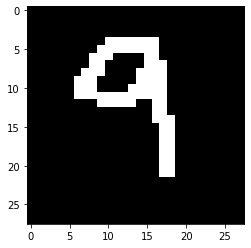

In [19]:
# 마지막 이미지 시각화
%matplotlib inline
from matplotlib import pyplot as plt
plt.imshow(img, cmap='gray')

In [20]:
mytrain_input = np.reshape(mytrain_input, (-1, 784))
mytrain_input = mytrain_input.astype(np.float32)
print(mytrain_input.shape)

(10, 784)


In [21]:
correct_prediction = tf.argmax(predicted_value, 1)
sess.run(correct_prediction, feed_dict={x: mytrain_input})

array([6, 2, 5, 4, 5, 6, 7, 7, 8, 9], dtype=int64)

C:\Users\tldud\.conda\envs\tldud\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  """


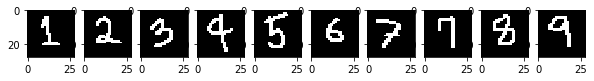

In [22]:
# 원본 MNIST 데이터와 Reconstruction 결과를 비교
f, a = plt.subplots(1, 10, figsize=(10, 1))
for i in range(len(mytrain_input)):
    a[i].imshow(np.reshape(mytrain_input[i], (28, 28)), cmap='gray')
f.show()

### 정확도= 0.8 